 #Experimento 1 (Distribución de velocidades de Maxwell)
 Trabajo junto Ciro Gelvez
 
 ## Introducción
 
 Primero para realizar este experimento, se descargó el libro "The Art of Molecular Dynamics Simulation" de Rapaport. Seguidamente, realizamos unos cambios a los archivos `.c` llamado `/src/pr_02_1.c`, luego se procedió a compilar nuevamente el trabajo. Finalmente obtuvimos un archivo `.csv` con los datos de posiciones y velocidades de partículas.
 
Estos datos experimentales se obtuvieron a partir de una simulación de un gas de discos suaves que interactúan de acuerdo al potencial de Lennard Jones truncado, el cual esta dado por

\begin{equation}
V_{LJ} = 4 \epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left(\frac{\sigma}{r} \right)^6 \right] = \epsilon \left[ \left( \frac{r_m}{r} \right)^{12} - 2\left(\frac{r_m}{r} \right)^6 \right]
\end{equation}

Ahora con este resultado se realizará una animación e histogramas de las posiciones y velocidades de las partículas, siguiendo la hipótesis de que en equilibrio las rapideces se distribuyen de acuerdo a la distribución de Rayleigh, la cual esta dada por:

\begin{equation}
f( x ; \epsilon) = \frac{x}{\epsilon^2} e^{-x^2 / (2\epsilon^2)} \ \ , \ x \geq 0
\end{equation}


In [92]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [93]:
%pylab
from matplotlib import animation

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [94]:
choreography=genfromtxt("Rayleigh.csv",delimiter=",")
x=choreography[:,0]
y=choreography[:,1]
x1=choreography[:,2]
y1=choreography[:,3]

## Resultados

In [104]:
%matplotlib qt

fig=figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-38, 38), ylim=(-38, 38))
ax.grid()
line, = ax.plot([], [], 'o', lw=2)


def animate(i):
    thisx = x[(i-1):1600*i]
    thisy = y[(i-1):1600*i]
    line.set_data(thisx, thisy)
    return line

ani = animation.FuncAnimation(fig, animate, 1600,interval=5, blit=False)

show()

In [103]:
%matplotlib qt

fig=figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-38, 38), ylim=(-38, 38))
ax.grid()
line, = ax.plot([], [], 'o', lw=2)


def animate(i):
    thisx = x[(i-1)*1600:1600*i]
    thisy = y[(i-1)*1600:1600*i]
    line.set_data(thisx, thisy)
    return line

ani = animation.FuncAnimation(fig, animate, 41600,interval=10, blit= False)

show()

In [101]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


Ahora vermos la distribución de Rayleigh para la velocidad de los ultimos 1600 datos.

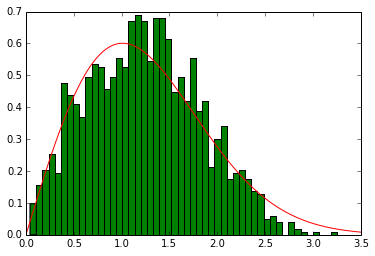

In [102]:
vel = array(sqrt(x1[400000:401600]**2+y1[400000:401600]**2))
def f(x,sigma):
    return x*exp(-x**2/(2*sigma**2))/sigma**2

fitparts, ajs = curve_fit(f,hist(vel,normed=True,bins=50)[1][0:50],hist(vel,normed=True,bins=50)[0])

px=linspace(0,3.5,5000)
py=f(px,fitparts)
plot(px,py)

show()

Aquí se puede ver como evoluciona la velocidad de las partículas desde las primeras 1600 partículas hasta las últimas, 

1
40000
2
80000
3
120000
4
160000
5
200000
6
240000
7
280000
8
320000
9
360000
10
400000


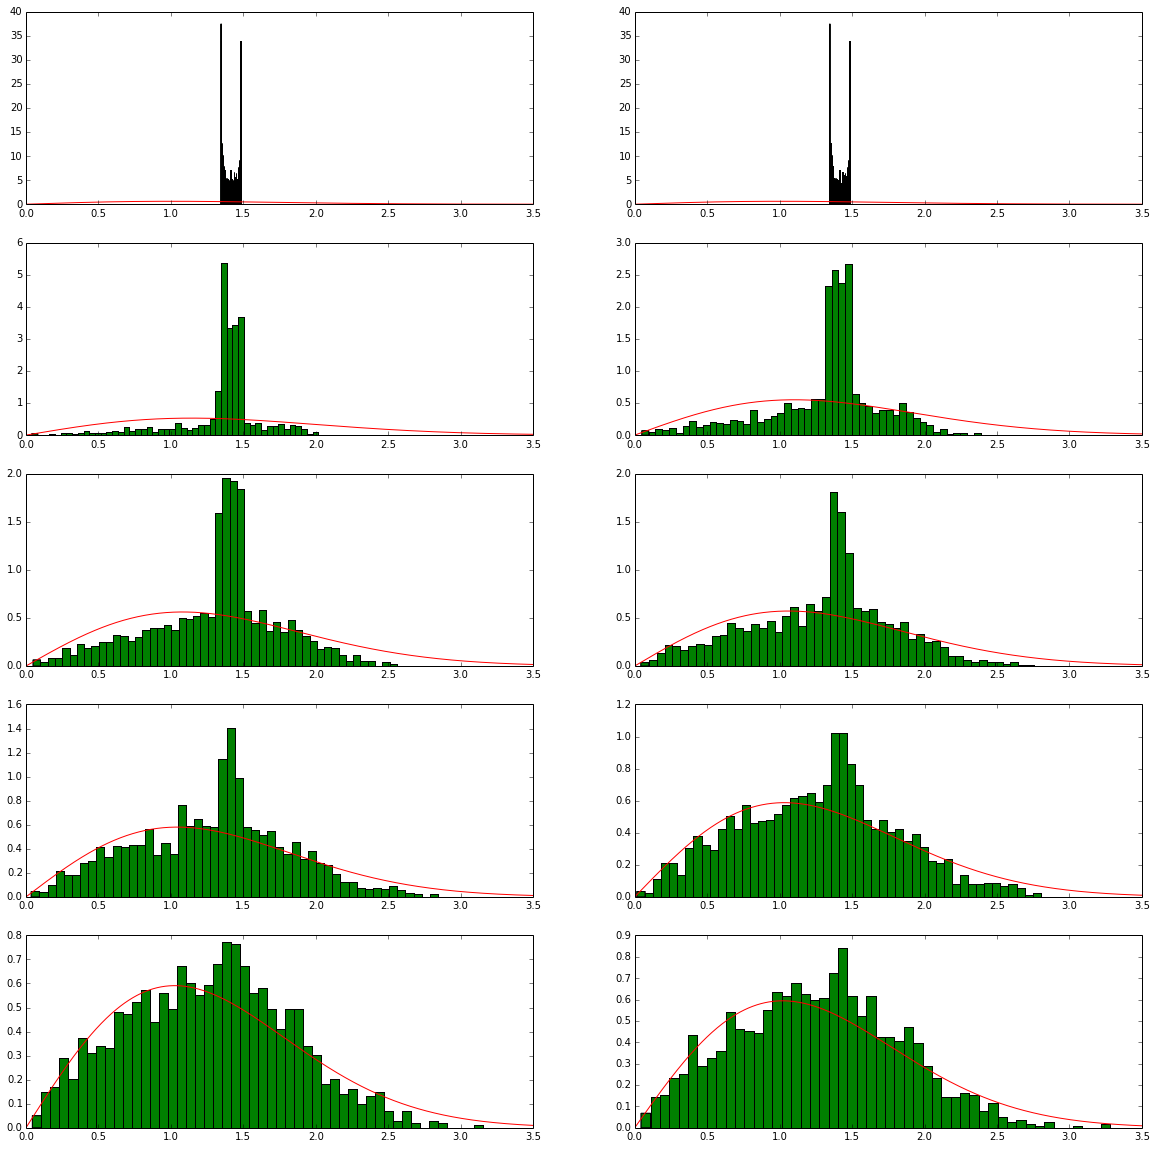

In [89]:
parar=False
i=0
x=0
figure(figsize=(20,20))
while(parar==False):
    vel = array(sqrt(x1[x:x+1600]**2+y1[x:x+1600]**2))
    subplot(5,2,i+1)
    fitparts, ajs = curve_fit(f,hist(vel,normed=True,bins=50)[1][0:50],hist(vel,normed=True,bins=50)[0])
    px=linspace(0,3.5,500)
    py=f(px,fitparts)
    plot(px,py)
    x+=1600*25
    i+=1
    print i
    print x
    if(x==400000):
        parar=True
show() 
